In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go


In [2]:
df = pd.read_csv('/content/drive/MyDrive/vehicles_us.csv')

In [3]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [4]:
df.tail()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71
51524,6300,2014.0,nissan altima,good,4.0,gas,NaN,automatic,sedan,NaN,NaN,2018-06-05,10


In [5]:
df.shape

(51525, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [7]:
df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [8]:
df.nunique()

price            3443
model_year         68
model             100
condition           6
cylinders           7
fuel                5
odometer        17762
transmission        3
type               13
paint_color        12
is_4wd              1
date_posted       354
days_listed       227
dtype: int64

# **Data Cleaning**

In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

We found 5 missing values (model_year, cylinders, odometer, paint_color, is_4wd), so we must deal with them so that the data we have is not affected


**1) model_year**

In [11]:
df['model_year'].value_counts()

model_year
2013.0    3549
2012.0    3468
2014.0    3448
2011.0    3375
2015.0    3323
          ... 
1948.0       1
1961.0       1
1936.0       1
1949.0       1
1929.0       1
Name: count, Length: 68, dtype: int64

I will fill missing values using median and then check that the distribution didn't change. If the distribution is not affected, then what I did is correct.

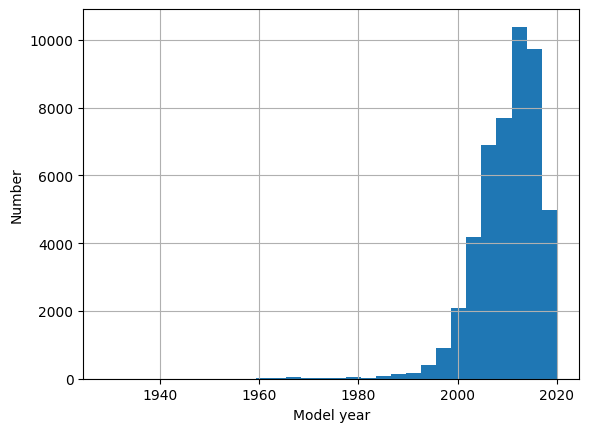

In [12]:
plot_range = (1929, 2020)

plt.hist(df['model_year'].dropna(), bins=30, range=plot_range)
plt.grid()
plt.xlabel('Model year')
plt.ylabel('Number')
plt.show()

In [13]:
df['model_year'] = df['model_year'].fillna(df.groupby(['model'])['model_year'].transform('median'))

In [14]:
df['model_year'].isnull().sum()

0

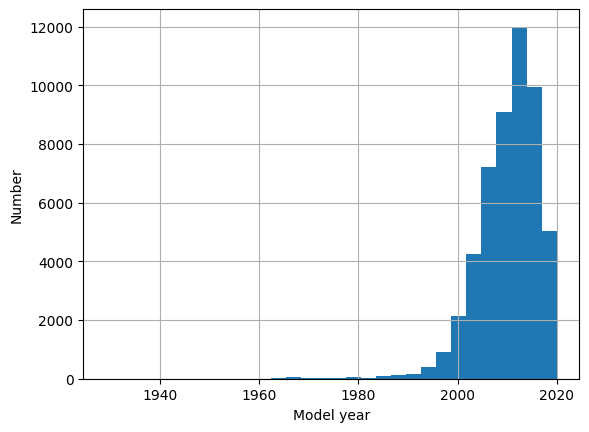

In [15]:
plot_range = (1929, 2020)

plt.hist(df['model_year'].dropna(), bins=30, range=plot_range)
plt.grid()
plt.xlabel('Model year')
plt.ylabel('Number')
plt.show()

Conclusion: the distribution has the same shape.

The peak at about 2013 looks higher, but it was expected.

**2) cylinders**

First we need to see the amount of missing values in this column

In [16]:
df['cylinders'].isnull().sum()

5260

In [17]:
df['cylinders'].value_counts() / len(df) * 100

cylinders
8.0     30.750121
6.0     30.470645
4.0     26.907327
10.0     1.065502
5.0      0.527899
3.0      0.065987
12.0     0.003882
Name: count, dtype: float64

We'll use groupby with mode methods to take the most frequent value.

In [18]:
df['cylinders'] = df.groupby(['model'])['cylinders'].transform(lambda grp: grp.fillna(grp.mode()[0]))

In [19]:
df['cylinders'].isnull().sum()

0

In [20]:
df['cylinders'].value_counts() / len(df) * 100

cylinders
8.0     34.375546
6.0     33.880640
4.0     30.080543
10.0     1.065502
5.0      0.527899
3.0      0.065987
12.0     0.003882
Name: count, dtype: float64

Conclusion: as expected there's more or less equal rise of percents (about 4%) in the most frequent categories that's normal.

**3) odometer**

First we need to see the amount of missing values in this column

In [21]:
df['odometer'].isnull().sum()

7892

In [22]:
df['odometer'].value_counts()

odometer
0.0         185
140000.0    183
120000.0    179
130000.0    178
160000.0    167
           ... 
138580.0      1
94624.0       1
123321.0      1
202627.0      1
139573.0      1
Name: count, Length: 17762, dtype: int64

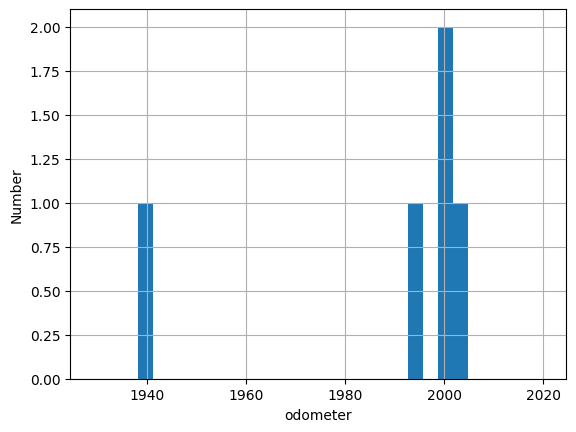

In [23]:
plt.hist(df['odometer'].dropna(), bins=30, range=plot_range)
plt.grid()
plt.xlabel('odometer')
plt.ylabel('Number')
plt.show()

Since there is no relationship between the missing values, we must put the median in its place, because if we put another number, it will affect the price, and this causes confusion in the data.

In [24]:
df['odometer_clean'] = df['odometer'].fillna(df.groupby(['model_year'])['odometer'].transform('median'))


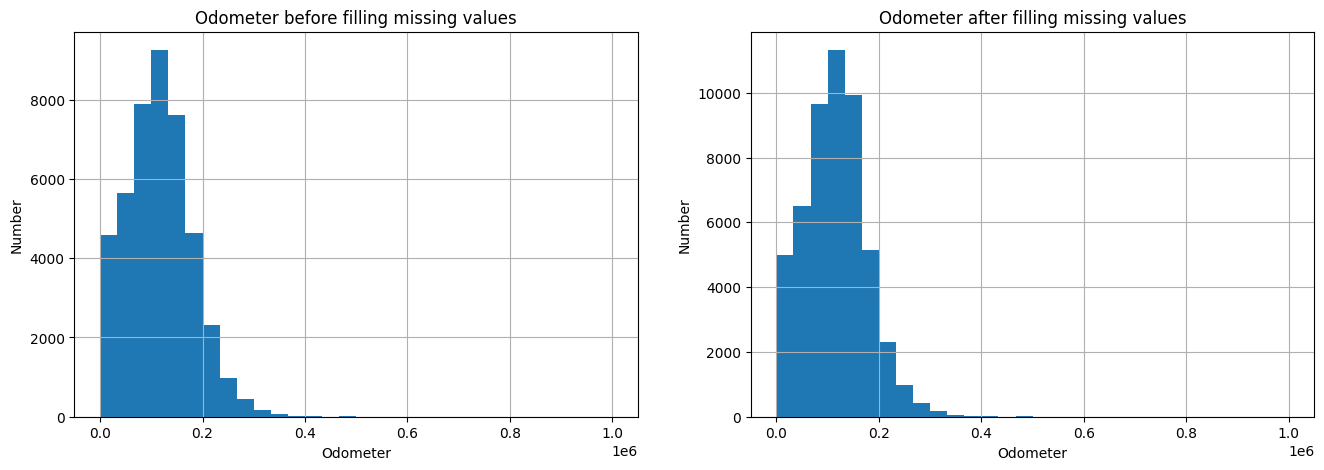

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

plot_range = (0, 1000000)

ax[0].hist(x = df['odometer'].dropna(), range = plot_range, bins = 30)
ax[0].grid()
ax[0].set_title('Odometer before filling missing values')
ax[0].set_xlabel('Odometer')
ax[0].set_ylabel('Number')

ax[1].hist(x = df['odometer_clean'], range = plot_range, bins = 30)
ax[1].grid()
ax[1].set_title('Odometer after filling missing values')
ax[1].set_xlabel('Odometer')
ax[1].set_ylabel('Number')

plt.show()

We've checked that the data distribution remained the same. Although the peak looks higher right now, it was expected.



**4) paint_color**

In [26]:
df['paint_color'].value_counts()

paint_color
white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: count, dtype: int64

Since the missing values are the color, we do not have the ability to predict the missing color, as there is no connection between the data, so we cannot fill it in randomly, so we must put the value (NA) In place of missing values

In [27]:
df['paint_color'] = df['paint_color'].fillna('NA')

In [28]:
df['paint_color'].value_counts()

paint_color
white     10029
NA         9267
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: count, dtype: int64

**5) is_4wd**

In [29]:
df['is_4wd'].value_counts()

is_4wd
1.0    25572
Name: count, dtype: int64

Since we have one value in this column
This column talks about whether the car is 4-wd or not. We know that there are only 4-wd drive and 2-wd drive cars, and there is no third option. So we conclude that the missing values must be filled in are 0 (according to Boolean values)

In [30]:
df['is_4wd'] = df['is_4wd'].fillna(0)

In [31]:
df['is_4wd'].value_counts()

is_4wd
0.0    25953
1.0    25572
Name: count, dtype: int64


**now we have the claning data and it is ready to do our Analysis and Visualization**


# **Exploratory data analysis**




**1) Visualizing the numerical column**






- starting with the price

In [32]:
df['price'].describe()

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64

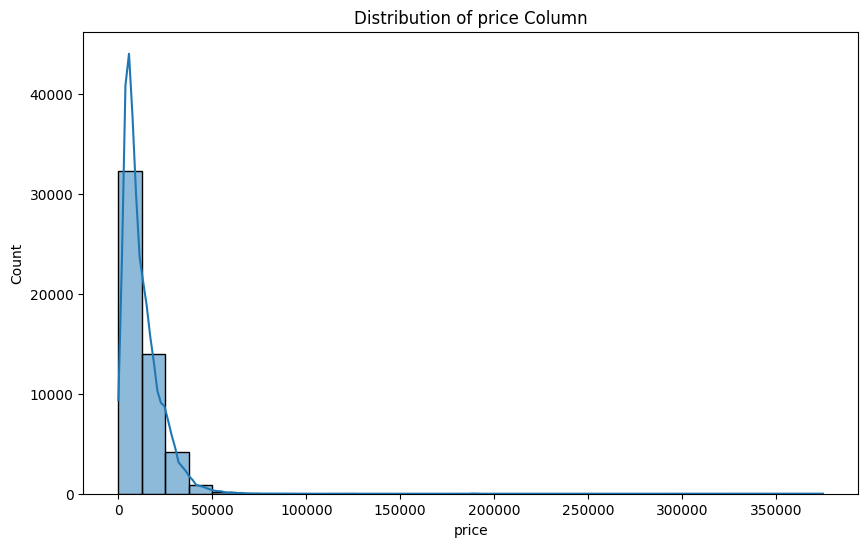

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of price Column')
plt.show()

When we look at the graph, we see that it starts from zero.

 This is illogical because there are no cars that cost 0 or even 200. We must check the values, look for common things, and find out the reason.

In [34]:
df[df['price'] == 0]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,odometer_clean


In [35]:
df[df['price'] == 1]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,odometer_clean
405,1,2014.0,chevrolet camaro,excellent,6.0,gas,71310.0,automatic,coupe,NA,0.0,2018-07-14,29,71310.0
3063,1,1998.0,chevrolet silverado,good,8.0,gas,164000.0,automatic,pickup,NA,1.0,2018-10-11,49,164000.0
3808,1,2007.0,chevrolet tahoe,good,8.0,gas,200.0,automatic,SUV,red,0.0,2019-03-18,63,200.0
3902,1,1996.0,ford f-150,fair,8.0,gas,163000.0,manual,truck,white,0.0,2019-02-23,54,163000.0
4140,1,2004.0,chevrolet silverado,excellent,8.0,diesel,83000.0,automatic,pickup,NA,1.0,2019-02-04,14,83000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49699,1,2007.0,chevrolet trailblazer,excellent,8.0,gas,NaN,automatic,SUV,black,1.0,2018-08-06,28,142000.0
49709,1,2010.0,ford f150,excellent,8.0,gas,139700.0,other,pickup,red,1.0,2019-03-11,18,139700.0
50245,1,1986.0,chevrolet silverado,good,8.0,gas,NaN,automatic,truck,red,1.0,2018-11-30,50,90420.0
50393,1,2003.0,gmc sierra 2500hd,good,8.0,diesel,212300.0,automatic,pickup,black,1.0,2019-04-12,28,212300.0


In [36]:
df[df['price'] == 100]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,odometer_clean


In [37]:
df[df['price'] == 200]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,odometer_clean
14009,200,2018.0,nissan rogue,like new,4.0,gas,11900.0,automatic,SUV,silver,1.0,2018-08-12,17,11900.0
22420,200,2001.0,jeep grand cherokee,fair,8.0,gas,99999.0,automatic,SUV,red,1.0,2018-05-27,9,99999.0
30444,200,2000.0,nissan maxima,fair,6.0,gas,NaN,automatic,sedan,white,0.0,2018-11-10,158,175000.0
34173,200,2015.0,ford fusion,excellent,4.0,gas,90000.0,automatic,sedan,white,0.0,2018-12-25,19,90000.0
34221,200,2017.0,hyundai elantra,excellent,4.0,gas,77000.0,automatic,sedan,red,0.0,2018-05-06,44,77000.0


Based on the data, we conclude that there are several logical possibilities for these prices, such as: the seller does not want to display the price on the website and wants to negotiate with the buyer alone, and that the data is 100% incorrect.

- Now we move to the car model. We want to explore the existing models.

In the world of automobile sales, when a car model is mentioned, the first question that comes to mind is also the number of kilometers it has, so we explore these two values together.

In [38]:
df['model_year'].describe()

count    51525.000000
mean      2009.793954
std          6.099296
min       1908.000000
25%       2007.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64

In [39]:
df['model_year'].value_counts()

model_year
2011.0    4017
2013.0    3994
2012.0    3982
2014.0    3540
2008.0    3462
          ... 
1948.0       1
1961.0       1
1936.0       1
1949.0       1
1929.0       1
Name: count, Length: 70, dtype: int64

In [40]:
df['odometer'].describe()

count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64

In [41]:
df['odometer'].value_counts()

odometer
0.0         185
140000.0    183
120000.0    179
130000.0    178
160000.0    167
           ... 
138580.0      1
94624.0       1
123321.0      1
202627.0      1
139573.0      1
Name: count, Length: 17762, dtype: int64

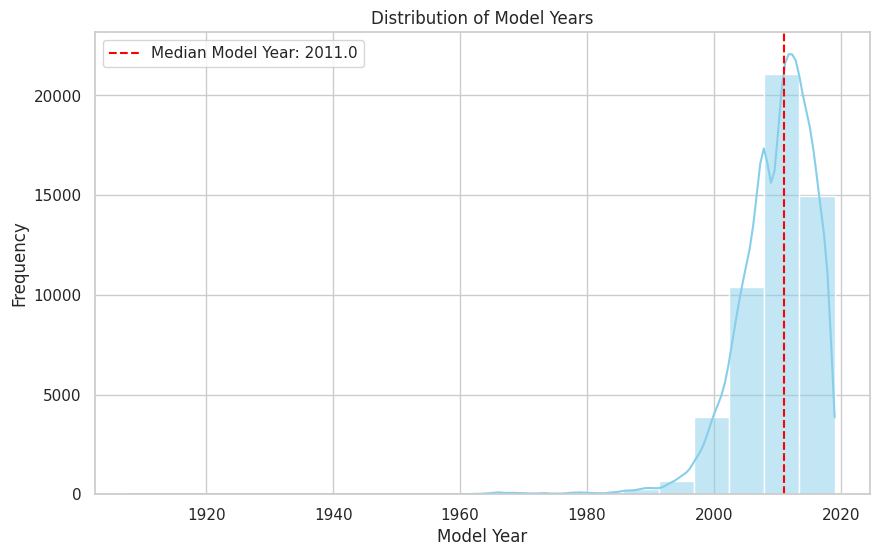

In [42]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df['model_year'], kde=True, color='skyblue', bins=20)
median_model_year = df['model_year'].median()
plt.axvline(x=median_model_year, color='red', linestyle='--', label=f'Median Model Year: {median_model_year}')
plt.title('Distribution of Model Years')
plt.xlabel('Model Year')
plt.ylabel('Frequency')
plt.legend()
plt.show()

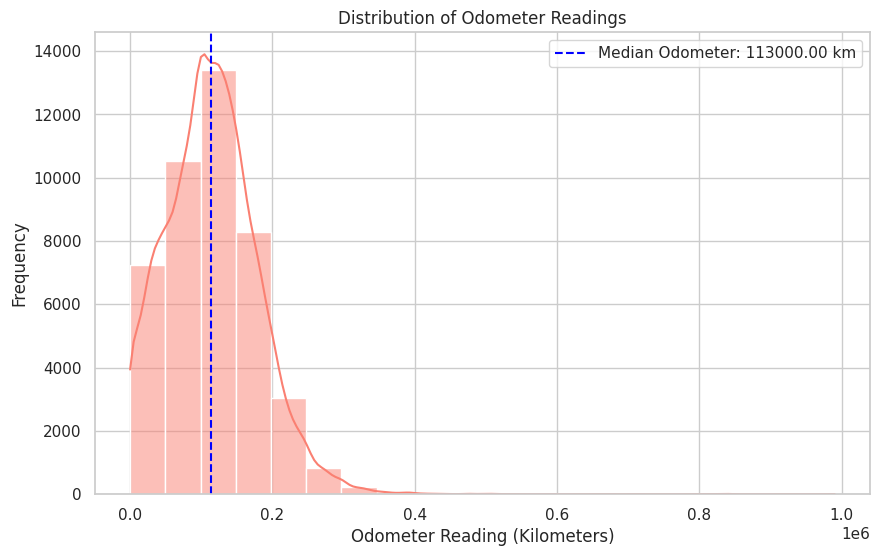

In [43]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df['odometer'], kde=True, color='salmon', bins=20)
median_odometer = df['odometer'].median()
plt.axvline(x=median_odometer, color='blue', linestyle='--', label=f'Median Odometer: {median_odometer:.2f} km')
plt.title('Distribution of Odometer Readings')
plt.xlabel('Odometer Reading (Kilometers)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

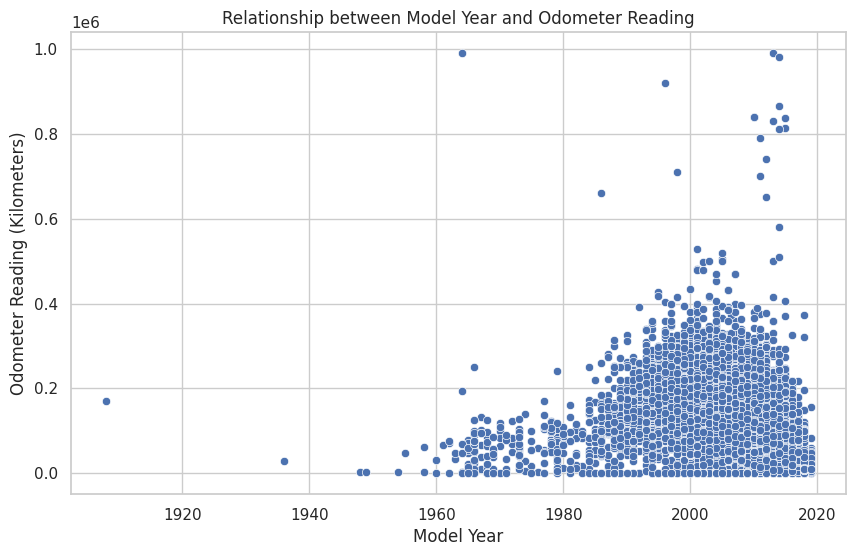

In [44]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['model_year'], y=df['odometer'], data=df)
plt.title('Relationship between Model Year and Odometer Reading')
plt.xlabel('Model Year')
plt.ylabel('Odometer Reading (Kilometers)')
plt.show()

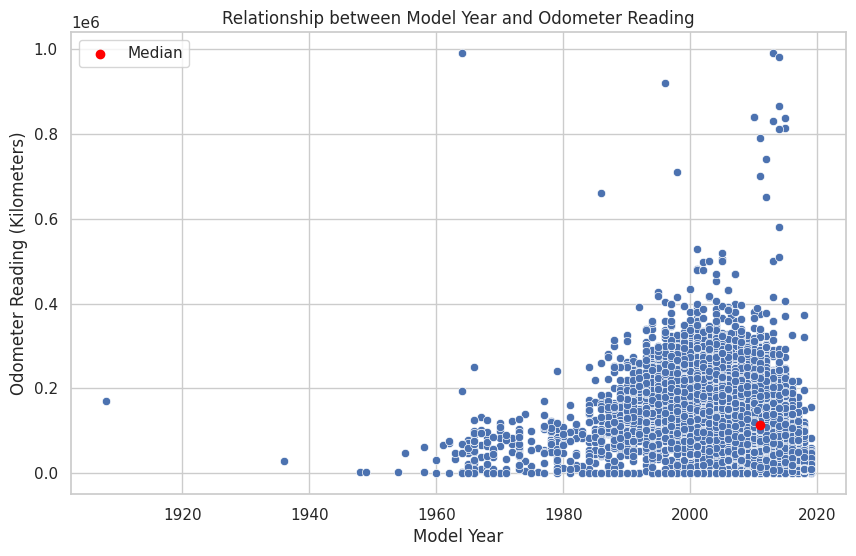

In [45]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['model_year'], y=df['odometer'], data=df)
median_model_year = df['model_year'].median()
median_odometer = df['odometer'].median()
plt.scatter(median_model_year, median_odometer, color='red', marker='o', label='Median')
plt.title('Relationship between Model Year and Odometer Reading')
plt.xlabel('Model Year')
plt.ylabel('Odometer Reading (Kilometers)')
plt.legend()
plt.show()

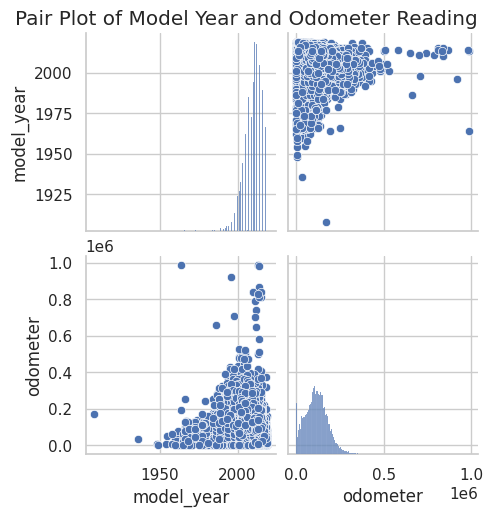

In [46]:

sns.pairplot(df[['model_year', 'odometer']])
plt.suptitle('Pair Plot of Model Year and Odometer Reading', y=1.02)
plt.show()

In the pair plot:

The diagonal shows the distribution of each variable (model_year and odometer).
The scatter plots show the relationship between model_year and odometer.
After observing the pair plot, if we don't see a clear linear relationship between model_year and odometer, we might summarize the relationship as follows:

Summary: There appears to be no significant linear relationship between the model year of cars and their odometer readings. However, there might be other factors influencing the odometer readings, such as driving habits, maintenance, or vehicle usage patterns. Further analysis or additional variables may be necessary to understand the relationship more comprehensively.

- now we move to the number of cylinders

In [47]:
df['cylinders'].describe()

count    51525.000000
mean         6.121494
std          1.657296
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

In [48]:
df['cylinders'].value_counts()

cylinders
8.0     17712
6.0     17457
4.0     15499
10.0      549
5.0       272
3.0        34
12.0        2
Name: count, dtype: int64

Since there are few options we can handle the fees smoothly

In [49]:
cylinders = df['cylinders'].value_counts()
fig = go.Figure(data=[go.Pie(labels=cylinders.index, values=cylinders.values, hole=.3)])
fig.update_layout(title='Distribution of the number of cylinders')
fig.show()

According to the graph, we conclude that the results are close for the first three cylinders (8,6,4), but for more details, cylinder 8 is ranked first.

- In the final stage, we want to explore whether to buy four-wheel drive or two-wheel drive

In [50]:
df['is_4wd'].describe()

count    51525.000000
mean         0.496303
std          0.499991
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: is_4wd, dtype: float64

In [51]:
df['is_4wd'].value_counts()

is_4wd
0.0    25953
1.0    25572
Name: count, dtype: int64

In [52]:
is_4wd = df['is_4wd'].value_counts()
fig = go.Figure(data=[go.Pie(labels=is_4wd.index, values=is_4wd.values, hole=.3)])
fig.update_layout(title='Four-wheel drive VS Two-wheel drive')
fig.show()

We conclude that the results are very close, however, the two-wheel drive outperforms the four-wheel drive by less than one percent

**2) Visualizing the categoreal column**

- we will start with the model.



In [53]:
df['model'].describe()

count          51525
unique           100
top       ford f-150
freq            2796
Name: model, dtype: object

In [54]:
df['model'].value_counts()

model
ford f-150                           2796
chevrolet silverado 1500             2171
ram 1500                             1750
chevrolet silverado                  1271
jeep wrangler                        1119
                                     ... 
ford f-250 super duty                 241
acura tl                              236
kia sorento                           236
nissan murano                         235
mercedes-benz benze sprinter 2500      41
Name: count, Length: 100, dtype: int64

As we can see, we have many models, so we will take the top 10 models and see the results

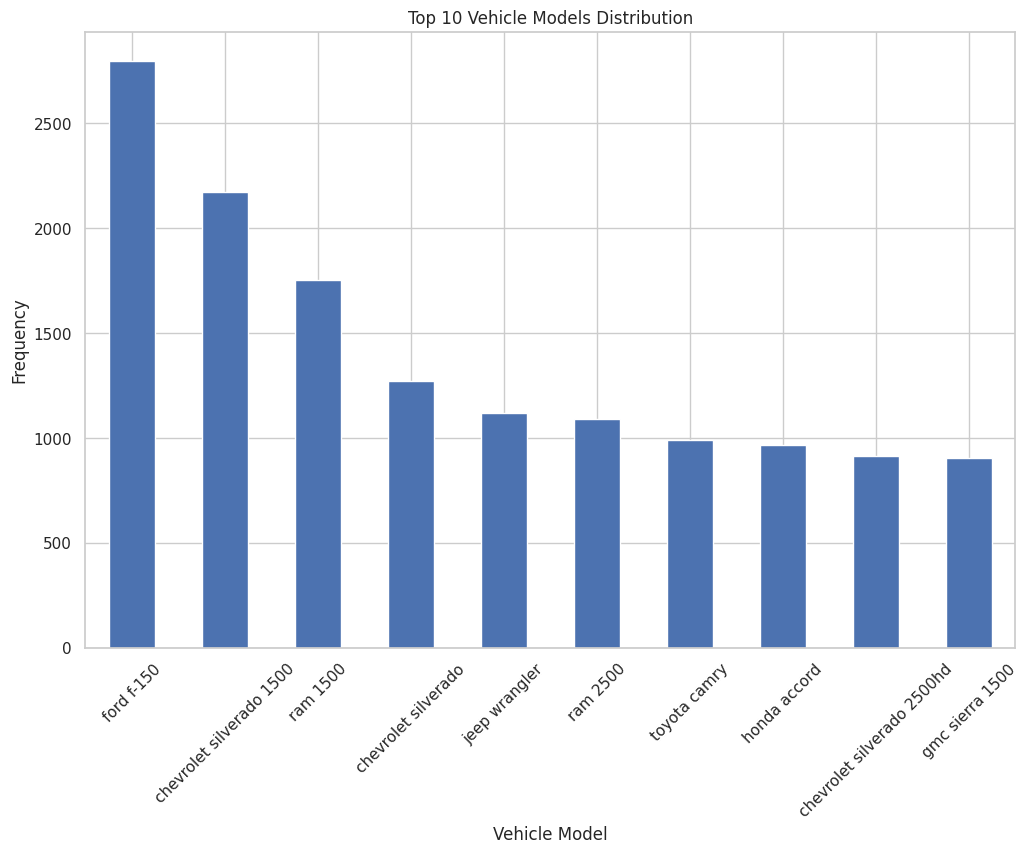

In [55]:
df['model'] = df['model'].astype('category')
model_counts = df['model'].value_counts()
top_n = 10
top_models = model_counts.head(top_n)

plt.figure(figsize=(12, 8))
top_models.plot(kind='bar', title=f'Top {top_n} Vehicle Models Distribution')
plt.xlabel('Vehicle Model')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

The bar chart visualization highlighted the top 10 most frequent vehicle models.

The most common vehicle models include (ford f-150), (chevrolet silverado 1500 ), and (ram 1500) .

- Explain the condition for all cars

In [56]:
df['condition'].describe()

count         51525
unique            6
top       excellent
freq          24773
Name: condition, dtype: object

In [57]:
df['condition'].value_counts()

condition
excellent    24773
good         20145
like new      4742
fair          1607
new            143
salvage        115
Name: count, dtype: int64

Since we do not have many options, it is easy to work with the data and draw an easy-to-read graph

<ipython-input-58-32ffb16be5d5>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




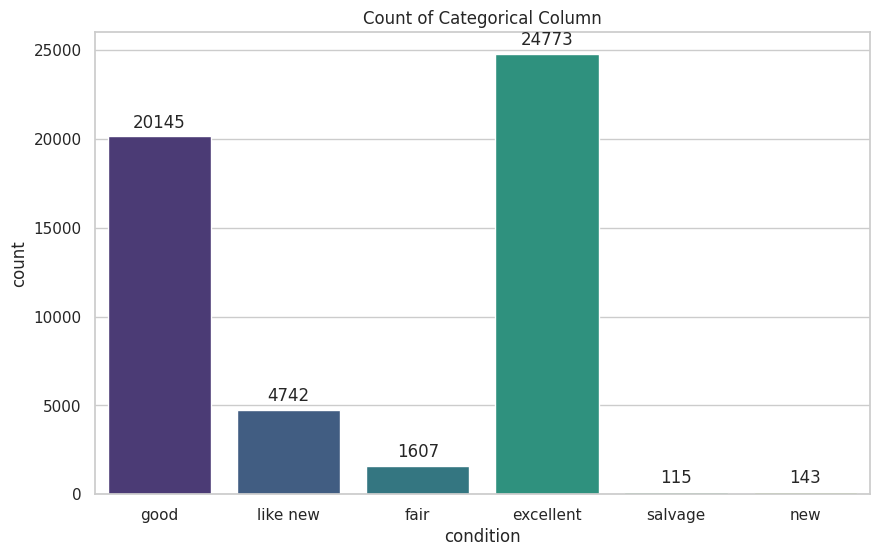

In [58]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='condition', palette='viridis')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = 'center', va = 'center',
                 xytext = (0, 10),
                 textcoords = 'offset points')

plt.title('Count of Categorical Column')
plt.show()

From the plot, we can observe which condition is most common among the cars in the dataset. For example, if 'excellent' and 'good' are the tallest bars, it indicates that most cars are in 'excellent' or 'good' condition. Conversely, if 'salvage' has the shortest bar, it suggests that fewer cars are in 'salvage' condition.

- Now we move to the type of fuel

As it is also easy to understand the graph

In [59]:
df['fuel'].describe()

count     51525
unique        5
top         gas
freq      47288
Name: fuel, dtype: object

In [60]:
df['fuel'].value_counts()

fuel
gas         47288
diesel       3714
hybrid        409
other         108
electric        6
Name: count, dtype: int64

In [61]:
business_travel_counts = df['fuel'].value_counts()
fig = go.Figure(data=[go.Pie(labels=business_travel_counts.index, values=business_travel_counts.values, hole=.3)])
fig.update_layout(title='Fuel type')
fig.show()

According to the data that we have, gas has the largest share in this data.

This is very logical because most people prefer cars that run on gas. Also, the data that we have is considered old. It seems that there has not been a large spread of hybrid and electric cars.

- take a look at the transmission

In [62]:
df['transmission'].describe()

count         51525
unique            3
top       automatic
freq          46902
Name: transmission, dtype: object

In [63]:
df['transmission'].value_counts()

transmission
automatic    46902
manual        2829
other         1794
Name: count, dtype: int64

<ipython-input-64-7d2f7abf9cfc>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




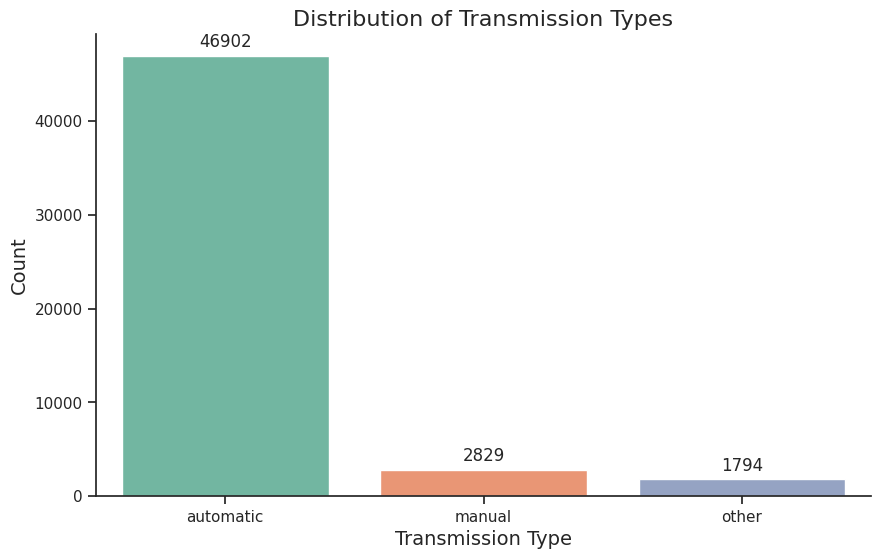

In [64]:
sns.set(style="ticks", palette="pastel")
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='transmission', palette='Set2')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')
ax.set_title('Distribution of Transmission Types', fontsize=16)
ax.set_xlabel('Transmission Type', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
sns.despine()
plt.show()

The pie chart reveals the distribution of transmission types in the dataset. It demonstrates the percentage of vehicles with automatic and manual transmissions. This visualization provides a clear overview of the relative prevalence of each transmission type.

Through the graph, we conclude that automation is the most widespread

- the type

In [65]:
df['type'].describe()

count     51525
unique       13
top         SUV
freq      12405
Name: type, dtype: object

In [66]:
df['type'].value_counts()

type
SUV            12405
truck          12353
sedan          12154
pickup          6988
coupe           2303
wagon           1541
mini-van        1161
hatchback       1047
van              633
convertible      446
other            256
offroad          214
bus               24
Name: count, dtype: int64

In real life, type is linked to price, so we will also link them together

In [67]:
type_to_price_pivot = df.pivot_table(index='type', values='price', aggfunc=['count', 'median'])
type_to_price_pivot.columns = ['Number', 'Average price']
type_to_price_pivot

,Number,Average price
type,,
SUV,12405,8900
bus,24,10500
convertible,446,12250
coupe,2303,12950
hatchback,1047,5980
mini-van,1161,6495
offroad,214,11650
other,256,8995
pickup,6988,14200


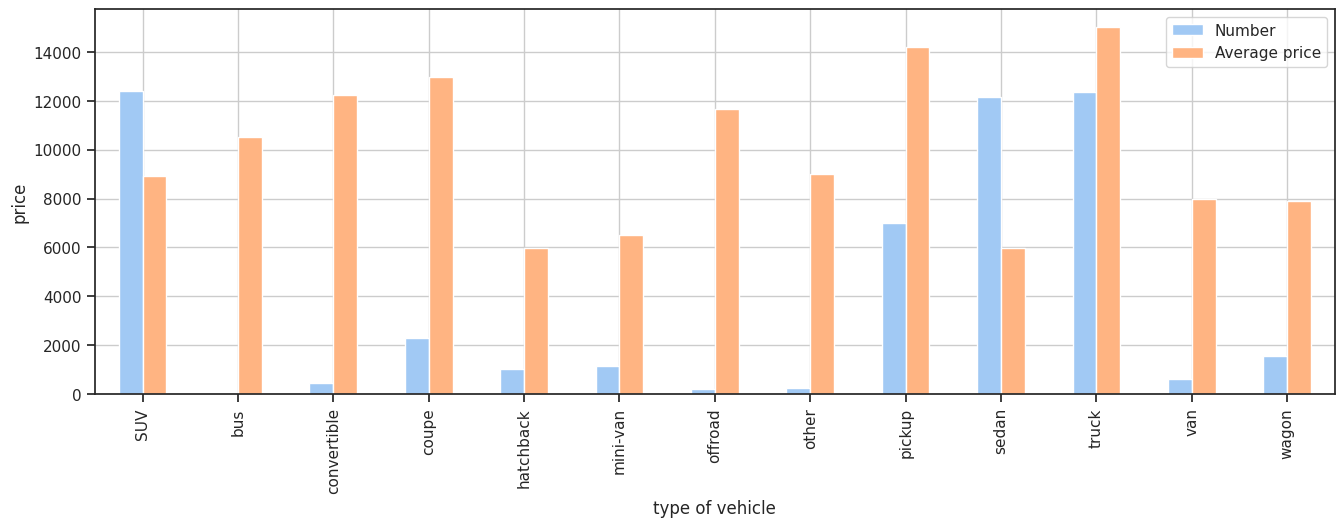

In [68]:
type_to_price_pivot.plot(kind='bar', grid=True, figsize=(16, 5))
plt.xlabel('type of vehicle')
plt.ylabel('price')

plt.show()

 **Conclusion**

The dataset presents a comprehensive overview of vehicle distribution by type and their corresponding average prices. Below is a summarized analysis:

- **SUVs**: Leading in count at 12,405, they maintain a modest average price of $8,900.

- **Trucks**: With 12,353 units, they command the highest average price at $14,995.

- **Sedans**: Abundant at 12,154, they maintain a lower average price of $5,995.

- **Pickup trucks**: With 6,988 units, they fetch a higher average price of $14,200.

- **Coupes and convertibles**: Fewer in count (2,303 and 446 respectively), demand higher average prices ($12,950$ and $12,250$).

- **Buses and vans**: Limited in count (24 and 633), exhibit moderate average prices ($10,500$ and $7,990$).

- **Mini-vans**: Despite moderate count (1,161), they show a lower average price at $6,495.

- **Off-road vehicles and other types**: With fewer counts (214 and 256), they have mid-range average prices ( $11,650$ and  $8,995$).

This analysis highlights the pricing diversity across vehicle types, influenced by market dynamics and consumer preferences.


- Now let's move on to the colors

In [69]:
df['paint_color'].describe()

count     51525
unique       13
top       white
freq      10029
Name: paint_color, dtype: object

In [70]:
df['paint_color'].value_counts()

paint_color
white     10029
NA         9267
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: count, dtype: int64

<ipython-input-71-dd07e9ff2ef5>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




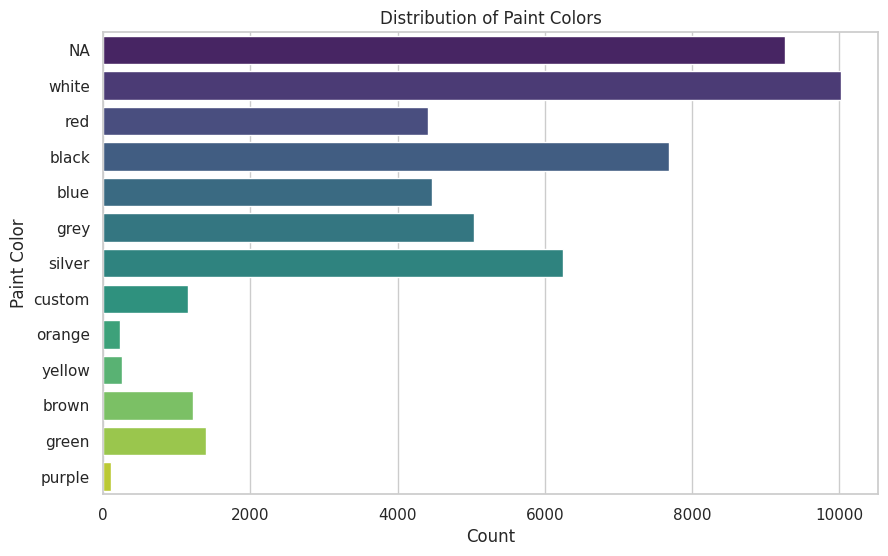

In [71]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='paint_color', palette='viridis')
plt.title('Distribution of Paint Colors')
plt.xlabel('Count')
plt.ylabel('Paint Color')
plt.show()

**Bivariate Analysis**

Analyze relationships between two variables:

in this part we will check which factors influence the price of a vehicle.

The factors we chose
*   model_year
*   transmission
*   type
*   paint_color
*   is_4wd




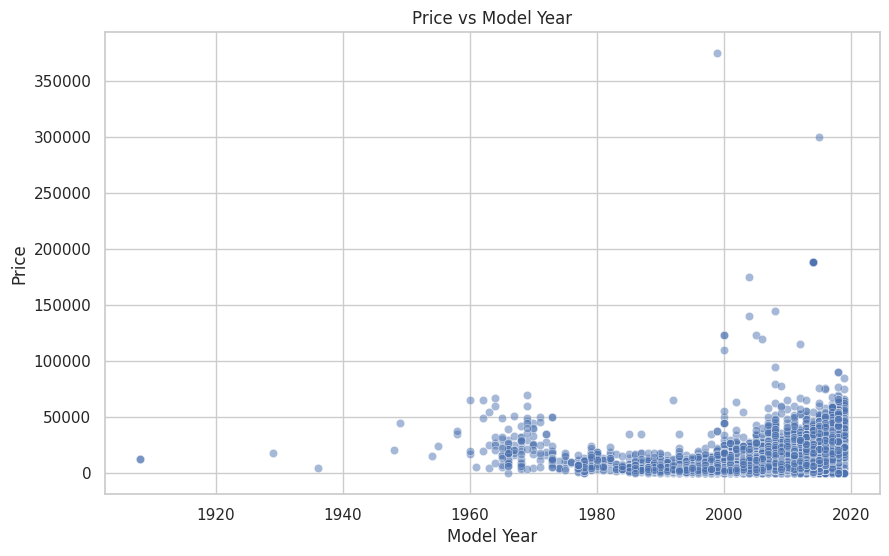

In [72]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='model_year', y='price', alpha=0.5)
plt.title('Price vs Model Year')
plt.xlabel('Model Year')
plt.ylabel('Price')
plt.grid(True)
plt.show()

<ipython-input-73-ab3d0b63f496>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




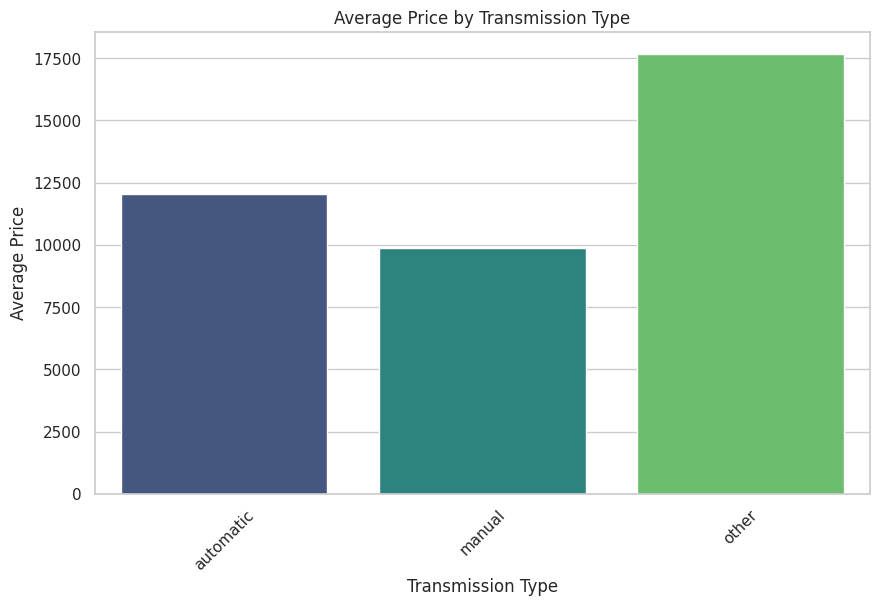

In [73]:
avg_transmission = df.groupby('transmission')['price'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_transmission, x='transmission', y='price', palette='viridis')
plt.title('Average Price by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

<ipython-input-74-eefeaf2ff739>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




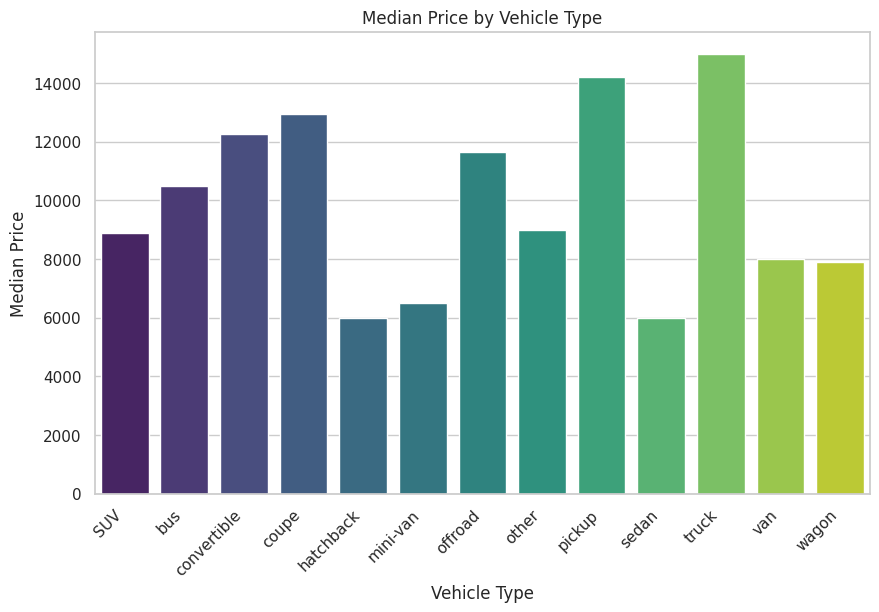

In [74]:
median_prices = df.groupby('type')['price'].median()
plt.figure(figsize=(10, 6))
sns.barplot(x=median_prices.index, y=median_prices.values, palette='viridis')
plt.title('Median Price by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Median Price')
plt.xticks(rotation=45, ha='right')
plt.show()

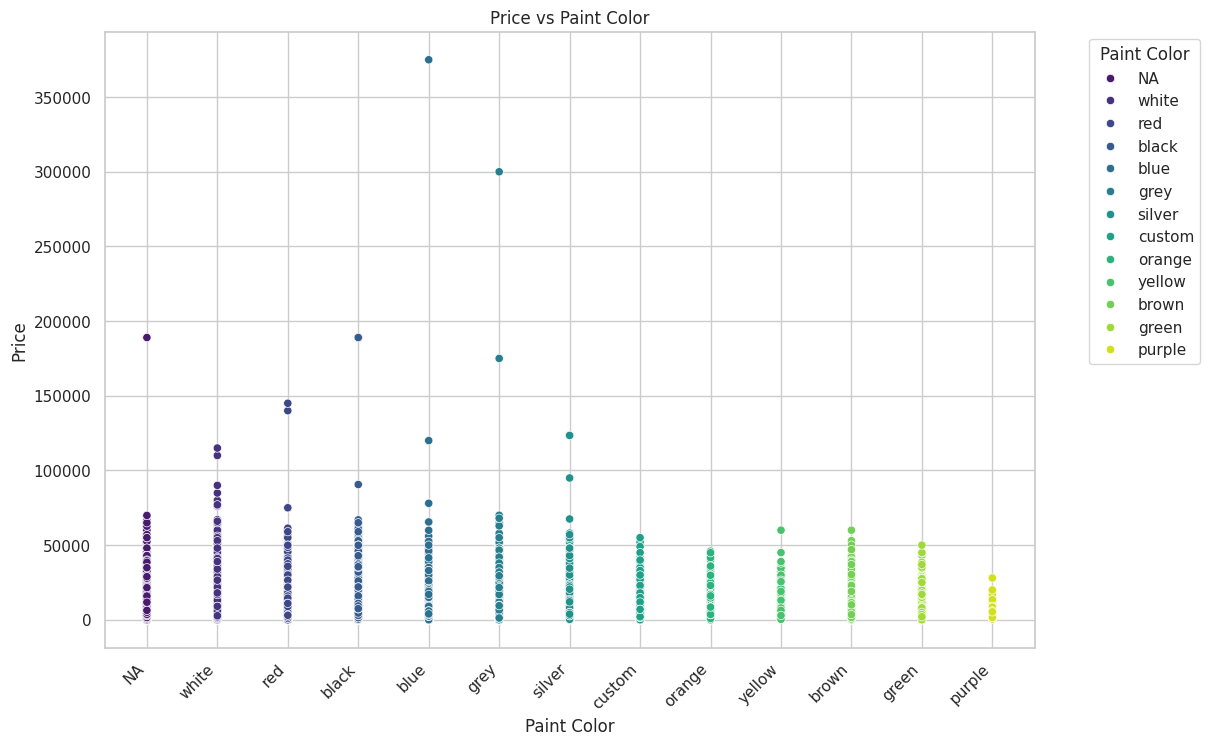

In [75]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='paint_color', y='price', hue='paint_color', palette='viridis')
plt.title('Price vs Paint Color')
plt.xlabel('Paint Color')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Paint Color', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

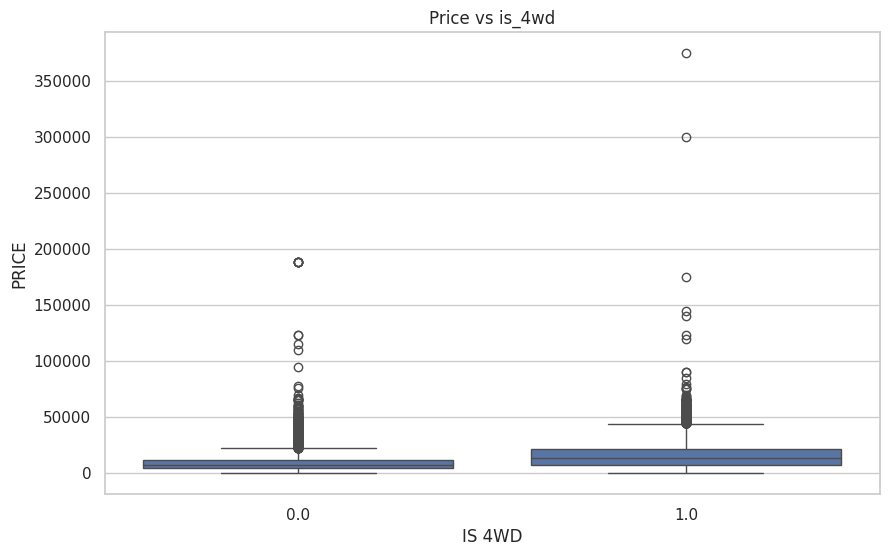

In [76]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='is_4wd', y='price')
plt.title('Price vs is_4wd')
plt.xlabel('Is 4WD'.upper())
plt.ylabel('Price'.upper())
plt.show()

#**Conclusion**



---



First, we cleaned the data and found a solution for the empty values.

Then we began the analysis with the **Numerical Values :**
- as we started with the price and found irrational prices such as zero, and based on the data, we conclude that there are several logical possibilities for these prices, such as: the seller does not want to display the price on the site and wants to negotiate with the buyer alone, and that the data is not 100% correct.

- Then we moved to the model year, where we concluded that there appears to be no statistically significant linear relationship between the car model year and the odometer readings. However, there may be other factors that affect odometer readings, such as driving habits, maintenance, or vehicle usage patterns. Further analysis or additional variables may be necessary to understand the relationship more comprehensively.

- We moved to the cylinder, as we conclude that the results are close for the first three cylinders (8,6,4), but for more details, cylinder 8 is in first place.

- In the end, we explored whether there is four-wheel drive or not, and we concluded that the results are very close, except that the two-wheel drive system outperforms the four-wheel drive system by less than one percent.



We completed our analysis with **Categorial Values:**

- In the beginning, we analyzed the most common car models, including the most famous vehicle models (Ford F150), (Chevrolet Silverado 1500), and (Ram 1500).

- Then we moved to examining the car and concluded from the chart that we can observe the most common condition among the cars in the data set. For example, if “Excellent” and “Good” are the longest bars, this indicates that most cars are in “Excellent” or “Good” condition. Conversely, if “salvage” has the shortest bar, it indicates that fewer cars are in “salvage” condition.

- Then to the type of fuel, and according to the data available to us, gas has the largest share in this data.
This makes a lot of sense since most people prefer gas-powered cars. Also, the data we have is outdated. It seems that there has not been a large spread of hybrid and electric cars.

- Then to the transmission, and through the graph we conclude that automation is the most widespread.

**Recommendations for business:**

When building a prediction model the following factors should be considered a high priority:

*   Vehicle's age: the older the car, the smaller the price. Half of the cars are sold before they turn 9 yo.
*   Vehicle's condition: the better the condition, the higher the price. Most cars sold on the website are described as 'excellent'.
*   Vehicle's mileage: the bigger the odometer value, the smaller the price. Note, there are cases where odometer value is written to be 0, which seems unreliable, our advice is to check this issue.
*   A vehicle's transmission type being other than automatic or manual tends to be the most expensive.

